In [1]:
!pip install pandas
!pip install matplotlib
import pandas as pd


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
# df = pd.read_csv('./mysql_error.txt', sep=',')
df = pd.read_csv("./info_vs_data_600.csv", sep=',')
df["Log_type"] = df["Log_type"].str.replace("MLOG_", "").str.replace("COMP_", "")
df

Time(sec)       Space  Page_no               Log_type  Log_len   
0                0   Warehouse        6    REC_UPDATE_IN_PLACE       52  \
1                0    District       10    REC_UPDATE_IN_PLACE       54   
2                0  New_orders     7066  REC_CLUST_DELETE_MARK       31   
3                0   Warehouse        6    REC_UPDATE_IN_PLACE       52   
4                0  New_orders     3322  REC_CLUST_DELETE_MARK       31   
...            ...         ...      ...                    ...      ...   
1495251        600  Order_line   236951             REC_INSERT       22   
1495252        600  Order_line   205322                 8BYTES        7   
1495253        600  Order_line   205322             REC_INSERT       22   
1495254        600       Stock   672789    REC_UPDATE_IN_PLACE       64   
1495255        600  Order_line   968948             REC_INSERT       80   

         Is_in_old_sublist  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
1495251                  0  
1495252                  1  
1495253                  1  
1495254                  1  
1495255                  0  

[1495256 rows x 6 columns]

In [15]:
log_type_mappings = {
    1: "MLOG_1BYTE",
    2: "MLOG_2BYTES",
    4: "MLOG_4BYTES",
    8: "MLOG_8BYTES",
    9: "MLOG_REC_INSERT",
    10: "MLOG_REC_CLUST_DELETE_MARK",
    11: "MLOG_REC_SEC_DELETE_MARK",
    13: "MLOG_REC_UPDATE_IN_PLACE",
    14: "MLOG_REC_DELETE",
    15: "MLOG_LIST_END_DELETE",
    16: "MLOG_LIST_START_DELETE",
    17: "MLOG_LIST_END_COPY_CREATED",
    18: "MLOG_PAGE_REORGANIZE",
    19: "MLOG_PAGE_CREATE",
    20: "MLOG_UNDO_INSERT",
    21: "MLOG_UNDO_ERASE_END",
    22: "MLOG_UNDO_INIT",
    23: "MLOG_UNDO_HDR_DISCARD",
    24: "MLOG_UNDO_HDR_REUSE",
    25: "MLOG_UNDO_HDR_CREATE",
    26: "MLOG_REC_MIN_MARK",
    27: "MLOG_IBUF_BITMAP_INIT",
    28: "MLOG_LSN",
    29: "MLOG_INIT_FILE_PAGE",
    30: "MLOG_WRITE_STRING",
    31: "MLOG_MULTI_REC_END",
    32: "MLOG_DUMMY_RECORD",
    33: "MLOG_FILE_CREATE",
    34: "MLOG_FILE_RENAME",
    35: "MLOG_FILE_DELETE",
    36: "MLOG_COMP_REC_MIN_MARK",
    37: "MLOG_COMP_PAGE_CREATE",
    38: "MLOG_COMP_REC_INSERT",
    39: "MLOG_COMP_REC_CLUST_DELETE_MARK",
    40: "MLOG_COMP_REC_SEC_DELETE_MARK",
    41: "MLOG_COMP_REC_UPDATE_IN_PLACE",
    42: "MLOG_COMP_REC_DELETE",
    43: "MLOG_COMP_LIST_END_DELETE",
    44: "MLOG_COMP_LIST_START_DELETE",
    45: "MLOG_COMP_LIST_END_COPY_CREATED",
    46: "MLOG_COMP_PAGE_REORGANIZE",
    47: "MLOG_FILE_CREATE2",
    48: "MLOG_ZIP_WRITE_NODE_PTR",
    49: "MLOG_ZIP_WRITE_BLOB_PTR",
    50: "MLOG_ZIP_WRITE_HEADER",
    51: "MLOG_ZIP_PAGE_COMPRESS",
    52: "MLOG_ZIP_PAGE_COMPRESS_NO_DATA",
    53: "MLOG_ZIP_PAGE_REORGANIZE",
    54: "MLOG_FILE_RENAME2",
    55: "MLOG_FILE_NAME",
    56: "MLOG_CHECKPOINT",
    57: "MLOG_PAGE_CREATE_RTREE",
    58: "MLOG_COMP_PAGE_CREATE_RTREE",
    59: "MLOG_INIT_FILE_PAGE2",
    60: "MLOG_TRUNCATE",
    61: "MLOG_INDEX_LOAD",
}
def get_log_type(log_num):
    return log_type_mappings.get(log_num, "Unknown")
#df['Log_type]이 문자열인데 숫자로 변환하기
df['Log_type'] = df['Log_type'].astype(int)
df['Log_type'] = df['Log_type'].apply(get_log_type)
df = df.to_csv("./info_vs_data_600.csv", index=False)

In [6]:
df["Time(sec)"] =pd.to_numeric(df["Time(sec)"], errors='coerce')

In [7]:
# page별 로그외에 다른 로그들을 지워버리기
contains_non_numeric = df[df["Time(sec)"].isna() == True]
new_df = df.drop(contains_non_numeric.index)

In [8]:
#정확한 시간을 위해서 470초 이전 로그들은 삭제
new_df_2 = new_df.astype({"Time(sec)": int})
new_df_2["Time(sec)"] -= 470
new_df_3 = new_df_2[new_df_2["Time(sec)"] >= 0]

In [9]:
#인덱스 새롭게 달고, 모든 숫자들 int로 바꾸기
new_df_3 = new_df_3.reset_index(drop=True)
new_df_4 = new_df_3.astype({"Space": int,"Page_no": int, "Log_type": int, "Log_len": int, "Is_in_old_sublist": int})


In [10]:
changing_to_table_name = {2: "Warehouse", 3: "District", 4: "Customer", 5: "History", 6: "New_orders", 7: "Orders", 8: "Order_line", 9: "Item", 10: "Stock"}
new_df_4["Space"].replace(changing_to_table_name, inplace=True)
new_df_4

Time(sec)       Space  Page_no  Log_type  Log_len  Is_in_old_sublist
0                 0   Warehouse        6        41       52                  0
1                 0    District       10        41       54                  0
2                 0  New_orders     7066        39       31                  0
3                 0   Warehouse        6        41       52                  0
4                 0  New_orders     3322        39       31                  0
...             ...         ...      ...       ...      ...                ...
68108981      43397  New_orders     1522        38       31                  0
68108982      43397  New_orders     1522        38       31                  0
68108983      43397  New_orders     1522         4        4                  0
68108984      43397  New_orders     1494         4        4                  1
68108985      43397  New_orders        2         4        4                  0

[68108986 rows x 6 columns]

In [23]:
# 정보시각화용 데이터
new_df_4["Time(sec)"] = new_df_4["Time(sec)"].astype(int)
info_vs_data = new_df_4[new_df_4["Time(sec)"] <= 1200]
info_vs_data.to_csv("info_vs_data.csv", index=False)
log_sum = info_vs_data.groupby(["Space", "Page_no"]).count().sort_values(by="Page_no", ascending=False)
log_sum

Time(sec)  Log_type  Log_len  Is_in_old_sublist
Space      Page_no                                                 
Stock      1124030          1         1        1                  1
           1124025          1         1        1                  1
           1124007          3         3        3                  3
           1124006          1         1        1                  1
           1124005          1         1        1                  1
...                       ...       ...      ...                ...
Order_line 1               34        34       34                 34
New_orders 0             2752      2752     2752               2752
Order_line 0             2022      2022     2022               2022
History    0              505       505      505                505
Orders     0              362       362      362                362

[394470 rows x 4 columns]

In [9]:
new_df_4["Log_len"] += 9
log_sum = new_df_4.groupby("Space")["Log_len"].sum()
log_sum.sum()



4060379427

In [10]:
#grouping by space + page_no
grouping_page = new_df_4.groupby(["Space", "Page_no"])
test_1 = pd.DataFrame(grouping_page["Log_len"].count())
test_1.rename(columns={"Log_len": "Log_Count"}, inplace=True)
test_1


Log_Count
Space     Page_no           
Customer  5                2
          7                4
          8                2
          9                3
          10               5
...                      ...
Warehouse 4           141004
          5           156995
          6           208313
          7           141143
          8             3974

[1831454 rows x 1 columns]

In [11]:
per_page = pd.DataFrame(grouping_page["Log_len"].sum().sort_values(ascending=True))
new_data = pd.concat([per_page, test_1], axis=1)
new_data = pd.concat([new_data, pd.DataFrame(new_data["Log_len"] / new_data["Log_Count"])], axis=1)
new_data.rename(columns={0: "average_log_len"}, inplace=True)
new_data


Log_len  Log_Count  average_log_len
Space      Page_no                                      
Orders     66824          12          1        12.000000
           66732          12          1        12.000000
Order_line 6820           13          1        13.000000
Orders     3382           13          1        13.000000
New_orders 1524           13          1        13.000000
...                      ...        ...              ...
District   20        2500250      39016        64.082684
Warehouse  4         8601244     141004        61.000000
           7         8609723     141143        61.000000
           5         9576695     156995        61.000000
           6        12707093     208313        61.000000

[1831454 rows x 3 columns]

In [12]:
#Log sum을 기준으로hot page에 대한 index 찾기
percentile = len(new_data) // 10
hot_page_sum = new_data[new_data["Log_len"] >= (16 * 1024)]
hot_page_sum.loc["Order_line"].head(20)
# hot_page_index_sum = hot_page_sum.index
# hot_page_index_sum
# #log sum hot page만 구하기.
# group_by_space_page_no = new_df_4.groupby(["Space", "Page_no", "Time(sec)"]).count()["Log_len"]
# group_by_space_page_no.rename("Log_Count", inplace=True)
# group_by_space_page_no = group_by_space_page_no.reset_index(["Time(sec)"])
# hot_page_group = group_by_space_page_no.loc[hot_page_index_sum]
# hot_page_group
#끝
# hot_page_group


Log_len  Log_Count  average_log_len
Page_no                                     
52296      16384        253        64.758893
672732     16385        253        64.762846
437911     16385        512        32.001953
326748     16385        253        64.762846
872151     16386        399        41.067669
870759     16389        418        39.208134
968580     16401        101       162.386139
788083     16403        189        86.788360
573081     16404        502        32.677291
662786     16405        189        86.798942
616730     16406        189        86.804233
904638     16406        189        86.804233
28708      16406        189        86.804233
481821     16406        189        86.804233
1009046    16409        191        85.910995
870254     16410        400        41.025000
1008499    16411        191        85.921466
1008909    16411        191        85.921466
1011887    16411        191        85.921466
1010989    16411        191        85.921466

In [18]:
cold_page = new_df_4[new_df_4["Space"] == "Order_line"]
cold_page = cold_page[cold_page["Page_no"] == 870254]
cold_page = cold_page.groupby("Log_type").count()
cold_page

Time(sec)  Space  Page_no  Log_len  Is_in_old_sublist
Log_type                                                       
2                 1      1        1        1                  1
4                 3      3        3        3                  3
8                 6      6        6        6                  6
37                1      1        1        1                  1
38              387    387      387      387                387
45                1      1        1        1                  1
59                1      1        1        1                  1

In [13]:
cold_page = new_df_4[new_df_4["Space"] == "Order_line"]
cold_page = cold_page[cold_page["Page_no"] == 870254]
cold_page
# cold_page = cold_page.groupby("Time(sec)").sum()
# cold_page = cold_page["Log_len"]
# cold_page.sort_values()
# cold_page

data = {'Time{sec)': list(range(43200)),
        'value': 0}

df = pd.DataFrame(data)
df = df.set_index('Time{sec)')
df["value"] = cold_page
df_grouped = df.groupby(df.index // 60).sum()
df_grouped.rename(columns={"value": "Entire_Log_len"}, inplace=True)
df_grouped.to_csv('./my_page_3.csv')
# result.fillna(0, inplace=True)
# cold_page.to_csv('./my_page.csv')


#log count 계산하기
# cold_page = new_df_4[new_df_4["Space"] == "Order_line"]
# cold_page = cold_page[new_df_4["Page_no"] == 872151]
# cold_page = cold_page.groupby(["Space", "Page_no", "Time(sec)"]).count()["Log_len"]
# cold_page.rename("Log_Count", inplace=True)
# cold_page.sort_values()
# # result.fillna(0, inplace=True)
# cold_page.to_csv('./my_page_2.csv')


In [19]:
hot_page_group_log_sum = new_df_4.groupby(["Space", "Page_no", "Time(sec)"]).sum()["Log_len"]
hot_page_group_log_sum.rename("Entire log sum", inplace=True)
hot_page_group_log_sum = hot_page_group_log_sum.reset_index(["Time(sec)"])
hot_page_group_log_sum

Time(sec)  Entire log sum
Space     Page_no                           
Customer  5            17929              85
          5            24868              85
          7             8070              89
          7            32784              89
          7            33899              85
...                      ...             ...
Warehouse 8            43339              61
          8            43354              61
          8            43359              61
          8            43382              61
          8            43390              61

[23086555 rows x 2 columns]

In [13]:
order_line_page_index = hot_page_group.groupby(["Space", "Page_no"]).sum().sort_values("Log_Count", ascending=True).index[-10:]
order_line_page_index_2 = new_data.index[-2:]
hot_page_index_sum


NameError: name 'hot_page_group' is not defined

In [100]:
result = pd.DataFrame()
for my_index in order_line_page_index:
    order_line_page = hot_page_group.loc[my_index]
    order_line_page.sort_values("Time(sec)", inplace=True)
    order_line_page.set_index("Time(sec)", inplace=True)
    order_line_page.rename(columns={"Log_Count": my_index}, inplace=True)
    result = pd.concat([result, order_line_page], axis=1)
result.sort_values("Time(sec)", inplace=True)
result.to_csv("./result.csv")
    

/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_6018/3798958034.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  order_line_page = hot_page_group.loc[my_index]
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_6018/3798958034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_line_page.sort_values("Time(sec)", inplace=True)
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_6018/3798958034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_line_page.rename(columns={"Log_Count": my_index}, inplace=True)
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000g

In [20]:
#hot page 기준 모든 log sum 구하기
result = pd.DataFrame()
for my_index in order_line_page_index_2:
    order_line_page = hot_page_group_log_sum.loc[my_index]
    order_line_page.sort_values("Time(sec)", inplace=True)
    order_line_page.set_index("Time(sec)", inplace=True)
    order_line_page.rename(columns={"Entire log sum": my_index}, inplace=True)
    result = pd.concat([result, order_line_page], axis=1)
result.sort_values("Time(sec)", inplace=True)
result = result.sum(axis=1) / len(hot_page_index_sum)
result.to_csv("./result_2.csv")
    

/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_92452/28938977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_line_page.sort_values("Time(sec)", inplace=True)
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_92452/28938977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_line_page.rename(columns={"Entire log sum": my_index}, inplace=True)
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_92452/28938977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

KeyboardInterrupt: 

In [39]:
hot_page_group_time = hot_page_group_log_sum.loc[hot_page_index_sum].reset_index()
hot_page_group_time = hot_page_group_time.astype({"Time(sec)": int})
hot_page_group_time


Space  Page_no  Time(sec)  Entire log sum
0             Stock   326357        548              73
1             Stock   326357       3182              73
2             Stock   326357       4527              73
3             Stock   326357      12681              73
4             Stock   326357      14002              73
...             ...      ...        ...             ...
16594539  Warehouse        6      43391             305
16594540  Warehouse        6      43392             305
16594541  Warehouse        6      43393             122
16594542  Warehouse        6      43394             488
16594543  Warehouse        6      43395             183

[16594544 rows x 4 columns]

In [41]:
per_time = hot_page_group_time.groupby("Time(sec)")["Entire log sum"].sum() / len(hot_page_index_sum)
per_time.to_csv("./result_3.csv")

In [31]:
sorting_log_len_per_page = new_data.sort_values(by=["Log_len"], ascending=True)
import matplotlib.pyplot as plt
data1 = sorting_log_len_per_page["Log_len"]
data2 = sorting_log_len_per_page["Log_Count"]
data3 = sorting_log_len_per_page["Avg_Log_len"]

plt.boxplot(data1)
plt.show()

plt.boxplot([data2, data3])
plt.show()

plt.boxplot(data3)
plt.show()


ValueError: The column label 'Log_len' is not unique.

In [134]:
sorting_log_len_per_page = new_data.sort_values(by=["Log_len"], ascending=True)
test = len(sorting_log_len_per_page) // 10
# real_result = pd.DataFrame()
# for i in range(1, 11):
#     result = sorting_log_len_per_page[test * (i - 1): test * i]
#     print(result["Log_len"].sum())
#     # result = sorting_log_len_per_page[(under_threshold <= sorting_log_len_per_page['Log_len']) & (sorting_log_len_per_page['Log_len'] < upper_threshold)][['Log_len', 'Log_Count', 'Avg_Log_len']]
#     result = result.describe()
#     real_result = pd.concat([real_result,result], axis=0)
    
# print(real_result)
# real_result.to_csv('./real_result{0}.csv'.format(i))

ValueError: The column label 'Log_len' is not unique.

In [ ]:
# Enitre log size and Log Count per Space
grouping_page_for_space = new_data.groupby(["Space"]).sum()
grouping_page_for_space

Log_len  Log_Count   Avg_Log_len
Space                                          
Customer     101622204    1302849  3.988654e+07
District      72108094    1309209  2.092977e+03
History      157502596    3665373  2.651941e+06
New_orders   750905733   15415122  4.111786e+05
Order_line  1754802891   35311770  1.688592e+07
Orders       155599796    3890345  4.449788e+06
Stock        420982931    6562889  5.326033e+07
Warehouse     33874308     651429  2.600000e+02

In [ ]:
# - Warehouse: 2
# - District: 3
# - Customer: 4
# - History: 5
# - New_orders : 6
# - Orders: 7
# - Order_line: 8
# - Item: 9
# - Stock: 10
grouping_page_for_space.to_csv('./grouping_page_for_space.csv')

In [ ]:
#------------------plotting------------------


In [ ]:
discard_df = sorting_log_len_per_page[: test * 1]
discard_df = discard_df.sort_values(by=["Log_len"], ascending=True)
discard_df
# discard_df["Log_len"].loc["Orders"]

Log_len  Log_Count  Avg_Log_len
Space      Page_no                                 
Order_line 1032193        0          2          0.0
           983041         0          2          0.0
           1015809        3          3          1.0
           999425         3          3          1.0
Orders     66824          3          1          3.0
...                     ...        ...          ...
Stock      101019        64          1         64.0
           101305        64          1         64.0
           968157        64          1         64.0
           968078        64          1         64.0
Order_line 85939         64          4         16.0

[183145 rows x 3 columns]

In [152]:
discard_df = new_df_4.groupby(["Space", "Page_no"]).sum()
test = len(discard_df) // 10
discard_df = discard_df.sort_values(by=["Log_len"], ascending=True)
discard_df = discard_df[test * 8: ]
discard_df = discard_df.sort_values(by=["Log_len"], ascending=True)
discard_df.loc["Orders"]

Time(sec)  Log_type  Log_len  Is_in_old_sublist
Page_no                                                 
10188       823175      1234     1095                  6
31864      1222287      1234     1096                  4
46445       946509      1200     1101                  7
43685       902177      1200     1101                  4
15844      1200387      1200     1104                  8
...            ...       ...      ...                ...
16384     79789818     13543    67892                  0
32768     85264067     14439    73515                  0
49152    100796982     13696    74950                  0
65536    155998910     36683   226082                  0
2        279809119     85566   302073                  0

[30765 rows x 4 columns]

In [ ]:
group_by_space = new_df_4.groupby(["Space", "Time(sec)"]).sum()

group_by_space_order_line = group_by_space.loc["Order_line"]
group_by_space_order_line["Log_len"].to_csv('./group_by_space_order_line.csv')
#select space == orderline
# orderline_space = hello[hello["Space"] == "Order_line"]
# orderline_space.get_gro

In [ ]:
new_df_4.sort_values(by=["Time(sec)"], ascending=True)
new_df_4

Time(sec)       Space  Page_no  Log_type  Log_len  Is_in_old_sublist
0                 0   Warehouse        6        41       52                  0
1                 0    District       10        41       54                  0
2                 0  New_orders     7066        39       31                  0
3                 0   Warehouse        6        41       52                  0
4                 0  New_orders     3322        39       31                  0
...             ...         ...      ...       ...      ...                ...
68108981      43397  New_orders     1522        38       31                  0
68108982      43397  New_orders     1522        38       31                  0
68108983      43397  New_orders     1522         4        4                  0
68108984      43397  New_orders     1494         4        4                  1
68108985      43397  New_orders        2         4        4                  0

[68108986 rows x 6 columns]

In [59]:
#make hot_cold_dataframe
hot_page = new_df_4[new_df_4["Space"] == "Stock"]
hot_page = hot_page[new_df_4["Page_no"] == 1023177]
hot_page = hot_page.groupby("Time(sec)").sum()
hot_page = hot_page["Log_len"]

cold_page = new_df_4[new_df_4["Space"] == "Stock"]
cold_page = cold_page[new_df_4["Page_no"] == 293474]
cold_page = cold_page.groupby("Time(sec)").sum()
cold_page = cold_page["Log_len"]

result = pd.concat([hot_page, cold_page], axis=1)
result.sort_values(by="Time(sec)", inplace=True)
# result.fillna(0, inplace=True)
result.to_csv('./result_Orders.csv')

/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_92452/715419136.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hot_page = hot_page[new_df_4["Page_no"] == 1023177]
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_92452/715419136.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cold_page = cold_page[new_df_4["Page_no"] == 293474]


In [ ]:
discard_df = sorting_log_len_per_page[test * 8: ]
discard_df.groupby("Space").count()

Log_len  Log_Count  Avg_Log_len
Space                                      
Customer        264        264          264
District         38         38           38
History       28758      28758        28758
New_orders     8511       8511         8511
Order_line   172904     172904       172904
Orders        24236      24236        24236
Stock        131578     131578       131578
Warehouse         5          5            5

In [ ]:
grouping_page = new_df_4.groupby(["Space", "Page_no"]).count()
grouping_page
# test_1 = pd.DataFrame(grouping_page.groupby("Time(sec)").)
# test_1.rename(columns={"Log_len": "Log_Count"}, inplace=True)
# test_1
# cold_page = test_1.loc["Order_line"]
# cold_page = cold_page.loc[137280]
# cold_page = cold_page[cold_page["Time(sec)"] >=39131]
# cold_page = cold_page[39149 > cold_page["Time(sec)"]]
# cold_page = cold_page.groupby("Time(sec)").sum()


Time(sec)  Log_type  Log_len  Is_in_old_sublist
Space     Page_no                                                 
Customer  5                2         2        2                  2
          7                4         4        4                  4
          8                2         2        2                  2
          9                3         3        3                  3
          10               5         5        5                  5
...                      ...       ...      ...                ...
Warehouse 4           141004    141004   141004             141004
          5           156995    156995   156995             156995
          6           208313    208313   208313             208313
          7           141143    141143   141143             141143
          8             3974      3974     3974               3974

[1831454 rows x 4 columns]

In [ ]:
print(new_data.count())
print(new_data[new_data["Log_len"] <= 832].count())

Log_len        1831454
Log_Count      1831454
Avg_Log_len    1831454
dtype: int64
Log_len        1469904
Log_Count      1469904
Avg_Log_len    1469904
dtype: int64


In [ ]:
#find percentile page
order_page = sorting_log_len_per_page.loc["Order_line"]
order_page.reset_index(inplace= True)
cutting_page = len(order_page) // 10
cutting_page_list = []
for i in range(0, 10):
    page = order_page.loc[cutting_page * i]["Page_no"]
    cutting_page_list.append(page)
    
page = order_page.loc[cutting_page * 10 - 1]["Page_no"]
cutting_page_list.append(page)
print(cutting_page_list)

[1032193.0, 12652.0, 76099.0, 572833.0, 777456.0, 255608.0, 548317.0, 804268.0, 992218.0, 983173.0, 2.0]


In [ ]:
#find page log len
result = pd.DataFrame()
for target_page_num in cutting_page_list:
    target_page = new_df_4[new_df_4["Space"] == "Order_line"]
    target_page = target_page[new_df_4["Page_no"] == target_page_num]
    target_page = target_page.groupby("Time(sec)").sum()
    target_page = target_page["Log_len"]
    result = pd.concat([result, target_page], axis=1)
result.to_csv('./result.csv')

/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_68893/3804532513.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_page = target_page[new_df_4["Page_no"] == target_page_num]
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_68893/3804532513.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_page = target_page[new_df_4["Page_no"] == target_page_num]
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_68893/3804532513.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_page = target_page[new_df_4["Page_no"] == target_page_num]
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_68893/3804532513.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_page = target_page[new_df_4["Page_no"] == target_page_num]
/var/folders/wl/zjf5kg513jq16bbml3_hhnwr0000gn/T/ipykernel_68893/3804532513.py:5: UserWarning: B

In [ ]:
table_log_len = new_df_4.groupby(["Space", "Time(sec)"]).sum()["Log_len"]
table_log_count = new_df_4.groupby(["Space", "Time(sec)"]).count()
print(table_log_count)

                     Page_no  Log_type  Log_len  Is_in_old_sublist
Space     Time(sec)                                               
Customer  2                4         4        4                  4
          3               15        15       15                 15
          4               69        69       69                 69
          5              175       175      175                175
          6              177       177      177                177
...                      ...       ...      ...                ...
Warehouse 43391           13        13       13                 13
          43392            7         7        7                  7
          43393            8         8        8                  8
          43394           18        18       18                 18
          43395           18        18       18                 18

[347165 rows x 4 columns]


In [ ]:
changing_to_table_name = ["Warehouse", "District", "Customer", "History", "New_orders", "Orders", "Order_line", "Stock"]
result = pd.DataFrame()
for table_name in changing_to_table_name:
    target_table = table_log_len.loc[table_name]
    print(target_table)
    result = pd.concat([result, target_table], axis=1)

result.sort_index(inplace=True)
result.to_csv('./result_table.csv')


Time(sec)
0         676
3         312
4        2392
5        4472
6        4576
         ... 
43391     676
43392     364
43393     416
43394     936
43395     936
Name: Log_len, Length: 43392, dtype: int64
Time(sec)
0         930
2         662
3         552
4        4952
5        9639
         ... 
43391    1214
43392     878
43393     880
43394    2034
43395    1997
Name: Log_len, Length: 43395, dtype: int64
Time(sec)
2          304
3         1148
4         5336
5        13656
6        13816
         ...  
43393     1248
43394     3436
43395     2496
43396      552
43397      560
Name: Log_len, Length: 43395, dtype: int64
Time(sec)
2          7617
3         75924
4        225168
5        412601
6        400763
          ...  
43392      1015
43393      1115
43394      2883
43395      2232
43396       278
Name: Log_len, Length: 43394, dtype: int64
Time(sec)
0           93
1           93
2          372
3          186
4        10508
         ...  
43393    17268
43394    10417
43395    

In [8]:
log_type = new_df_4.groupby(["Log_type"]).count().sort_values(by=["Log_len"], ascending=True)
log_type

Time(sec)     Space   Page_no   Log_len  Is_in_old_sublist
Log_type                                                            
27               13        13        13        13                 13
44             1541      1541      1541      1541               1541
43           170464    170464    170464    170464             170464
45           170464    170464    170464    170464             170464
37           174598    174598    174598    174598             174598
59           174624    174624    174624    174624             174624
1            229831    229831    229831    229831             229831
2            269278    269278    269278    269278             269278
39           650257    650257    650257    650257             650257
46          1133658   1133658   1133658   1133658            1133658
4           1258232   1258232   1258232   1258232            1258232
42          7931798   7931798   7931798   7931798            7931798
8           8519240   8519240   8519240   8519240            8519240
41          9839192   9839192   9839192   9839192            9839192
38         37585796  37585796  37585796  37585796           37585796

In [19]:
log_sum = new_df_4.groupby(["Log_type"])
log_sum = log_sum["Log_len"].sum()
log_sum = pd.concat([log_sum, log_type["Is_in_old_sublist"]], axis=1)
log_sum.rename(columns={"Is_in_old_sublist": "Log_count", "Log_len": "entire_log_sum"}, inplace=True)
log_sum = pd.concat([log_sum, pd.DataFrame(log_sum["entire_log_sum"] / log_sum["Log_count"])], axis=1)
log_sum.rename(columns={0: "avg_log_len"}, inplace=True)
log_sum.sort_values(by=["avg_log_len"], ascending=False, inplace=True)
log_sum.to_csv('./log_sum.csv')


In [18]:
log_hot_cold = new_df_4.groupby(["Log_type"])
log_hot_cold = log_hot_cold["Is_in_old_sublist"].sum()
log_hot_cold = pd.concat([log_type["Log_len"], log_hot_cold], axis=1)
log_hot_cold.rename(columns={"Log_len": "Log_count", "Is_in_old_sublist": "cold_page_count"}, inplace=True)
log_hot_cold = pd.concat([log_hot_cold, pd.DataFrame( (log_hot_cold["cold_page_count"] / log_hot_cold["Log_count"]) * 100)], axis=1)
log_hot_cold.rename(columns={0: "cold_page_percentage"}, inplace=True)
log_hot_cold

Log_count  cold_page_count  cold_page_percentage
Log_type                                                  
27               13                0              0.000000
44             1541              600             38.935756
43           170464            35709             20.948118
45           170464               29              0.017012
37           174598               29              0.016610
59           174624               29              0.016607
1            229831            10119              4.402800
2            269278             1464              0.543676
39           650257            28539              4.388880
46          1133658           231775             20.444878
4           1258232           162663             12.927902
42          7931798          1660991             20.940914
8           8519240          4821399             56.594238
41          9839192          5348834             54.362533
38         37585796          8612942             22.915417

In [30]:
log_sum = new_df_4.groupby(["Space", "Page_no"])
log_sum = log_sum["Log_len"].sum().sort_values(ascending=True)
log_count = new_df_4.groupby(["Space", "Page_no"])["Is_in_old_sublist"].count()
log_sum = pd.concat([log_sum, log_count], axis=1)
log_sum

Log_len  Is_in_old_sublist
Space      Page_no                             
Order_line 983041          0                  2
           1032193         0                  2
Orders     66824           3                  1
           66732           3                  1
Order_line 1015809         3                  3
...                      ...                ...
District   20        2149106              39016
Warehouse  4         7332208             141004
           7         7339436             141143
           5         8163740             156995
           6        10832276             208313

[1831454 rows x 2 columns]

In [25]:
log_sum[len(log_sum) // 10 * 9 : ].sum()

2829685713

In [26]:
for i in range(0, 10):
    print(log_sum[len(log_sum) // 10 * i : (len(log_sum) // 10) * (i + 1)].sum())

10186045
13719569
23105294
30320757
40369984
52964209
72657627
116727432
257661923
2796018053


In [27]:
log_sum[len(log_sum) // 10 * 9 : ].sum()

2829685713

   A      B
0  1   1000
1  2   2000
2  3   5000
3  4  10000


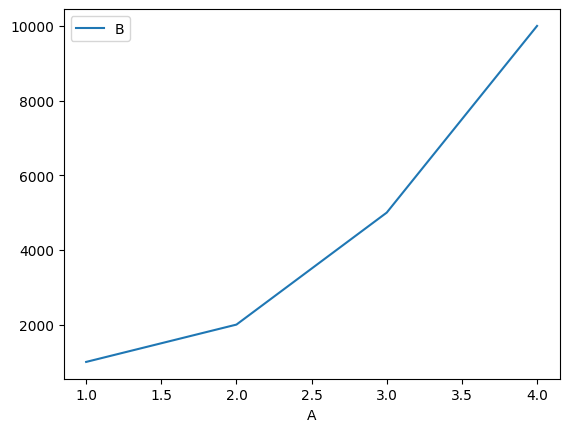

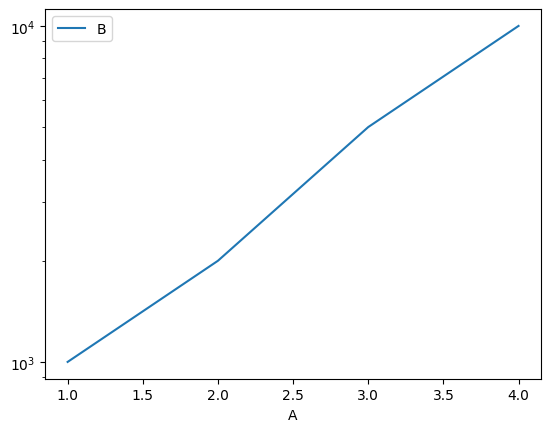

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [1000, 2000, 5000, 10000]})
print(df)

df.plot(x='A', y='B')
plt.show()

df.plot(x='A', y='B', logy=True)
plt.show()

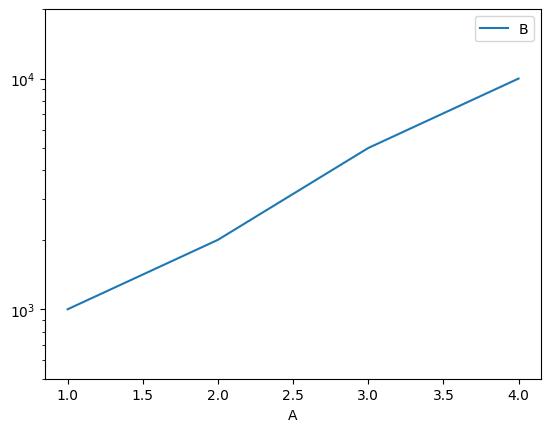

In [87]:
df.plot(x='A', y='B', logy=True)
plt.ylim([500, 20000])
plt.show()